## Análise de Dados dos Crimes Contra a Mulher em Belém

### 1. Seleção de dados

In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crimes_df = pd.read_csv(r"C:\Users\manut\Downloads\crimes_2019_a_2022.csv", low_memory=False)

In [3]:
pd.set_option('display.max_columns', None)
crimes_df.head()

,nro_bop,nro_bop_aditado,nro_tombo,tipo_tombo,unidade_origem,unidade_responsavel,data_registro,hora_registro,data_fato,dia_semana,hora_fato,fx_4_hor,fx_12_hr,data_inst_proc,data_concl_proc,sit_proc,classe_motivo,mes_registro,mes_fato,ano_registro,ano_fato,registros,consolidado,fato_real,especificacao_crime,meio_emp_deac,latitude,longitude,causa_presumivel,especializacao_fato,grupo_ocorrencia,sub_grupo,meio_empregado_sisp,distrito,municipios,regionais,bairros,reg_integracao,risp,aisp,rua_fato,empresa,linha,tipo_transporte,complemento,local_ocorrencia,identificacao_fato,relato,vit_dt_nasc,vit_idade,vit_fx_etaria,vit_nro_doc,vit_tipo_doc,vit_pai,vit_mae,vit_tipo,vit_sexo,vit_cor_pele,vit_grau_inst,vit_profissao,vit_situacao_emprego,vit_estado_civil,aut_data_nasc,aut_idade,aut_fx_etaria,aut_tipo,aut_sexo,grau_de_relacionamento,aut_cor_pele,aut_grau_inst,aut_profissao,aut_sit_emprego,aut_est_civil,meio_locomocao,cor_veiculo,marca_veic_fuga,modelo_do_veic_fuga,qtd_autor,relatorio,ident_autoria,atuacao
0,277/2019.255548-2,/.-,NAO INSTAURADO,NAO INSTAURADO,DEL.VIRTUAL - 277,SAO FELIX DO XINGU - UNIDADE POLICIAL 212,2019-12-12,1970-01-01 14:43:00,2019-12-11,QUA,1970-01-01 15:30:00,12 |-- 18,14 |-- 16,1900-09-09,1900-09-09,NAO INSTAURADO,CRIMES CONTRA O PATRIMONIO,DEZEMBRO,DEZEMBRO,2019,2019,ART.155 - FURTO,FURTO,NaN,NaN,NaN,NaN,NaN,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,CRIMES DE FURTO E ROUBO,BOPS NA DELEGACIA VIRTUAL,"EXT.,FURTO E ROUBO DE DOC.,CH. E CEL.",SEM INSTRUMENTO,SAO FELIX DO XINGU,SAO FELIX DO XINGU,ALTO XINGU,ZONA RURAL,REGIAO ARAGUAIA,14ª RISP,NaN,RUA PRINCIPAL,NaN,NaN,NaN,NaN,ESTABELECIMENTO BANCARIO,FURTO IP: 177.23.224.122,"O RELATOR ACIMA QUALIFICADO COMUNICA, ATRAVÉS ...",1943-06-24 00:00:00,76.0,IDOSO (65 ANOS OU MAIS),18637744834,CPF,ANTONIO ALVES DA SILVA,MARIA MARTINS DA SILVA,NaN,M,NaN,NaN,NaN,NaN,CASADO(A),1900-09-09 00:00:00,99999.0,NAO INFORMADO,NaN,NI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,277/2019.257206-7,/.-,NAO INSTAURADO,NAO INSTAURADO,DEL.VIRTUAL - 277,MARAMBAIA - PATRIMONIO 248 - 1º RISP- 9ª AISP,2019-12-16,1970-01-01 10:38:00,2019-12-10,TER,1970-01-01 15:00:00,12 |-- 18,14 |-- 16,1900-09-09,1900-09-09,NAO INSTAURADO,CRIMES CONTRA O PATRIMONIO,DEZEMBRO,DEZEMBRO,2019,2019,ART.155 - FURTO,FURTO,NaN,NaN,NaN,NaN,NaN,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,CRIMES DE FURTO E ROUBO,BOPS NA DELEGACIA VIRTUAL,"EXT.,FURTO E ROUBO DE DOC.,CH. E CEL.",SEM INSTRUMENTO,BELEM,BELEM,CAPITAL,MANGUEIRAO,REGIAO GUAJARA,01ª RISP,10ª AISP,CONJ. CATALINA,NaN,NaN,NaN,NaN,VIA PUBLICA,FURTO IP: 189.40.106.250,"O RELATOR ACIMA QUALIFICADO COMUNICA, ATRAVÉS ...",1969-11-14 00:00:00,50.0,ADULTO IV (35 A 64 ANOS),NaN,NaN,NaN,MARIA DAS GRA?AS ARAUJO SANTOS,NaN,F,NaN,NaN,NaN,NaN,UNIAO ESTAVEL,1900-09-09 00:00:00,99999.0,NAO INFORMADO,NaN,NI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,277/2019.161968-6,/.-,NAO INSTAURADO,NAO INSTAURADO,DEL.VIRTUAL - 277,TUCURUI - PESSOA 454,2019-08-10,1970-01-01 10:55:00,2019-08-06,TER,1970-01-01 13:30:00,12 |-- 18,12 |-- 14,1900-09-09,1900-09-09,NAO INSTAURADO,REGISTROS QUE NAO GERAM PROCEDIMENTO,AGOSTO,AGOSTO,2019,2019,DANO CULPOSO (CIVIL),DANO NO TRANSITO,NaN,NaN,NaN,NaN,NaN,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,DELITO DE TRANSITO,BOPS NA DELEGACIA VIRTUAL,"EXT.,FURTO E ROUBO DE DOC.,CH. E CEL.",SEM INSTRUMENTO,TUCURUI,TUCURUI,LAGO DE TUCURUI,CENTRO,REGIAO LAGO TUCURUI,09ª RISP,NaN,"PRINCIPAL, RUA",NaN,NaN,NaN,NaN,OUTROS,ACIDENTE DE TRANSITO IP: 131.255.227.254,"EXCLUSIVAMENTE PARA FINS DE DIREITO, O RELATOR...",1986-04-17 00:00:00,33.0,ADULTO III (30 A 34 ANOS),03981094984,CNH,NaN,RAIMUNDA OLIVEIRA DA SILVA,NaN,M,NaN,NaN,NaN,NaN,CASADO(A),1900-09-09 00:00:00,99999.0,NAO INFORMADO,NaN,NI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,277/2019.162974-0,/.-,NAO INSTAURADO,NAO INSTAURADO,DEL.VIRTUAL - 277,GUAMA - PATRIMONIO 326 - 1º RISP- 5ª AISP,2019-08-12,1970-01-01 13:00:00,2019-08-10,SAB,1970-01-01 19:30:00,18 |-- 24,18 |-- 20,1900-09-09,1900-09-09,NAO IN

### Fltrar apenas as colunas que interessam para a analise:
- Informações gerais:                  
    - unidade_origem'
    - unidade_responsavel'
    - 'data_fato'
    - 'dia_semana'
    - 'hora_fato'
    - 'fx_4_hor'
    - 'fx_12_hr'
    - 'classe_motivo'
    - 'mes_fato'
    - 'ano_fato'
    - 'registros'
    - 'consolidado'
    - 'especificacao_crime'
    - 'causa_presumivel'
    - 'especializacao_fato'
    - 'meio_empregado_sisp'
    - 'municipios'
    - 'bairros' 
    - 'local_ocorrencia'
    - 'identificacao_fato'
    - 'grau_de_relacionamento'
- Dados das vitimas:
   - 'vit_idade'
   - 'vit_fx_etaria'
   - 'vit_sexo'
   - 'vit_cor_pele'
   - 'vit_grau_inst'
   - 'vit_profissao'
   - 'vit_situacao_emprego'
   - 'vit_estado_civil'
- Dados dos autores: 
   - 'aut_idade'
   - 'aut_fx_etaria'
   - 'aut_sexo'
   - 'aut_cor_pele'
   - 'aut_grau_inst'
   - 'aut_profissao'
   - 'aut_sit_emprego'
   - 'aut_est_civil'


In [4]:
infos_df=crimes_df[['unidade_origem','unidade_responsavel','data_fato','dia_semana','hora_fato','fx_4_hor','fx_12_hr',
                            'classe_motivo','mes_fato','ano_fato','registros','consolidado','especificacao_crime','causa_presumivel',
                            'especializacao_fato','meio_empregado_sisp','municipios','bairros','local_ocorrencia',
                            'identificacao_fato','vit_idade','vit_fx_etaria','vit_sexo','vit_cor_pele','vit_grau_inst',
                            'vit_profissao','vit_situacao_emprego','vit_estado_civil','aut_idade','aut_fx_etaria','aut_sexo',
                            'grau_de_relacionamento','aut_cor_pele','aut_grau_inst','aut_profissao','aut_sit_emprego','aut_est_civil']]

In [5]:
#infos_df.head()

### Filtros para a capital Belém e vitimas apenas do sexo feminino

In [6]:
infos_df = infos_df[infos_df['municipios'] == 'BELEM']
infos_df.reset_index(drop=True, inplace=True)
infos_df.drop(columns=['municipios'], inplace=True)

In [7]:
infos_df

,unidade_origem,unidade_responsavel,data_fato,dia_semana,hora_fato,fx_4_hor,fx_12_hr,classe_motivo,mes_fato,ano_fato,registros,consolidado,especificacao_crime,causa_presumivel,especializacao_fato,meio_empregado_sisp,bairros,local_ocorrencia,identificacao_fato,vit_idade,vit_fx_etaria,vit_sexo,vit_cor_pele,vit_grau_inst,vit_profissao,vit_situacao_emprego,vit_estado_civil,aut_idade,aut_fx_etaria,aut_sexo,grau_de_relacionamento,aut_cor_pele,aut_grau_inst,aut_profissao,aut_sit_emprego,aut_est_civil
0,DEL.VIRTUAL - 277,MARAMBAIA - PATRIMONIO 248 - 1º RISP- 9ª AISP,2019-12-10,TER,1970-01-01 15:00:00,12 |-- 18,14 |-- 16,CRIMES CONTRA O PATRIMONIO,DEZEMBRO,2019,ART.155 - FURTO,FURTO,NaN,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,CRIMES DE FURTO E ROUBO,SEM INSTRUMENTO,MANGUEIRAO,VIA PUBLICA,FURTO IP: 189.40.106.250,50.0,ADULTO IV (35 A 64 ANOS),F,NaN,NaN,NaN,NaN,UNIAO ESTAVEL,99999.0,NAO INFORMADO,NI,NaN,NaN,NaN,NaN,NaN,NaN
1,DEL.VIRTUAL - 277,GUAMA - PATRIMONIO 326 - 1º RISP- 5ª AISP,2019-08-10,SAB,1970-01-01 19:30:00,18 |-- 24,18 |-- 20,CRIMES CONTRA O PATRIMONIO,AGOSTO,2019,ART.155 - FURTO,FURTO,NaN,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,CRIMES DE FURTO E ROUBO,SEM INSTRUMENTO,GUAMA,VIA PUBLICA,FURTO IP: 177.194.148.73,40.0,ADULTO IV (35 A 64 ANOS),F,NaN,NaN,NaN,NaN,SOLTEIRO(A),99999.0,NAO INFORMADO,NI,NaN,NaN,NaN,NaN,NaN,NaN
2,DEL.VIRTUAL - 277,SACRAMENTA - PATRIMONIO 240 - 1º RISP- 7ª AISP,2019-08-17,SAB,1970-01-01 12:30:00,12 |-- 18,12 |-- 14,CRIMES CONTRA O PATRIMONIO,AGOSTO,2019,ART.155 - FURTO,FURTO,NaN,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,CRIMES DE FURTO E ROUBO,SEM INSTRUMENTO,TELEGRAFO SEM FIO,TRANSPORTE,FURTO IP: 179.211.211.100,49.0,ADULTO IV (35 A 64 ANOS),F,NaN,NaN,NaN,NaN,SOLTEIRO(A),99999.0,NAO INFORMADO,NI,NaN,NaN,NaN,NaN,NaN,NaN
3,MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP,MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP,2019-11-01,SEX,1970-01-01 03:30:00,00 |-- 06,02 |-- 04,TITULO IV DA REPRESSAO A PRODUCAO NAO AUTORIZA...,NOVEMBRO,2019,TRAFICO DE DROGAS,TRAFICO DE DROGAS,NaN,ENTORPECENTES,NaN,OUTROS MEIOS,MARAMBAIA,VIA PUBLICA,TIPICA > LEI 11.343/2006: LEI DE DROGAS > TITU...,69.0,IDOSO (65 ANOS OU MAIS),PJ,NaN,ENSINO SUPERIOR COMPLETO,OUTRAS PROFISSOES,NaN,SOLTEIRO(A),99999.0,NAO INFORMADO,NI,NaN,NaN,NaN,NaN,NaN,NaN
4,MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP,MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP,2019-11-28,QUI,1970-01-01 21:10:00,18 |-- 24,20 |-- 22,TITULO XI DOS CRIMES CONTRA A ADMINISTRACAO PU...,NOVEMBRO,2019,DESACATO,DESACATO,NaN,DEVASSIDAO,NaN,OUTROS MEIOS,SOUZA,VIA PUBLICA,TIPICA > DECRETO LEI 2848/1940 - CPB - CODIGO ...,69.0,IDOSO (65 ANOS OU MAIS),PJ,NaN,ENSINO SUPERIOR COMPLETO,OUTRAS PROFISSOES,NaN,SOLTEIRO(A),99999.0,NAO INFORMADO,NI,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564456,NaN,NaN,2022-02-13 00:00:00,DOM,1970-01-01 07:30:00,06 |-- 12,06 |-- 08,TITULO I - DOS CRIMES CONTRA A PESSOA,FEVEREIRO,2022,AMEACA,AMEACA,NaN,OUTRAS,NaN,SEM INSTRUMENTO,COQUEIRO BELEM,RESIDENCIA,TIPICA > AMEACA > AMEACA,53.0,ADULTO IV (35 A 64 ANOS),M,PREJUDICADO,ENSINO MEDIO INCOMPLETO,COMERCIANTE,NaN,SOLTEIRO(A),66666.0,PREJUDICADO,P,NaN,PREJUDICADO,NaN,NaN,NaN,NaN
564457,NaN,NaN,2022-02-13 00:00:00,DOM,1970-01-01 01:14:59.999000,00 |-- 06,00 |-- 02,TITULO I - DOS CRIMES CONTRA A PESSOA,FEVEREIRO,2022,INVASAO DE DISPOSITIVO INFORMATICO CAPUT,INVASAO DE DISPOSITIVO INFORMATICO,NaN,OUTRAS,NaN,OUTROS MEIOS,MARAMBAIA,"CAFE, BAR, RESTAURANTE",TIPICA > DECRETO LEI 2848/1940 - CPB - CODIGO ...,35.0,ADULTO IV (35 A 64 ANOS),M,PREJUDICADO,ENSINO SUPERIOR COMPLETO,SERVIDOR PUBLICO,NaN,SOLTEIRO(A),NaN,PREJUDICADO,P,NaN,NaN,NaN,NaN,NaN,NaN
564458,NaN,NaN,2022-02-11 00:00:00,SEX,1970-01-01 00:00:59.999000,00 |-- 06,00 |-- 02,TITULO I - DOS CRIMES CONTRA A PESSOA,FEVEREIRO,2022,INVASAO DE DISPOSITIVO INFORMATICO CAPUT,INVASAO DE DISPOSITIVO INFORMATICO,NaN,OUTRAS,NaN,OUTROS MEIOS,PEDREIRA,CARRO DE TRANS

In [8]:
infos_df = infos_df[infos_df['vit_sexo'] == 'F']
infos_df.reset_index(drop=True, inplace=True)

In [9]:
infos_df

,unidade_origem,unidade_responsavel,data_fato,dia_semana,hora_fato,fx_4_hor,fx_12_hr,classe_motivo,mes_fato,ano_fato,registros,consolidado,especificacao_crime,causa_presumivel,especializacao_fato,meio_empregado_sisp,bairros,local_ocorrencia,identificacao_fato,vit_idade,vit_fx_etaria,vit_sexo,vit_cor_pele,vit_grau_inst,vit_profissao,vit_situacao_emprego,vit_estado_civil,aut_idade,aut_fx_etaria,aut_sexo,grau_de_relacionamento,aut_cor_pele,aut_grau_inst,aut_profissao,aut_sit_emprego,aut_est_civil
0,DEL.VIRTUAL - 277,MARAMBAIA - PATRIMONIO 248 - 1º RISP- 9ª AISP,2019-12-10,TER,1970-01-01 15:00:00,12 |-- 18,14 |-- 16,CRIMES CONTRA O PATRIMONIO,DEZEMBRO,2019,ART.155 - FURTO,FURTO,NaN,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,CRIMES DE FURTO E ROUBO,SEM INSTRUMENTO,MANGUEIRAO,VIA PUBLICA,FURTO IP: 189.40.106.250,50.0,ADULTO IV (35 A 64 ANOS),F,NaN,NaN,NaN,NaN,UNIAO ESTAVEL,99999.0,NAO INFORMADO,NI,NaN,NaN,NaN,NaN,NaN,NaN
1,DEL.VIRTUAL - 277,GUAMA - PATRIMONIO 326 - 1º RISP- 5ª AISP,2019-08-10,SAB,1970-01-01 19:30:00,18 |-- 24,18 |-- 20,CRIMES CONTRA O PATRIMONIO,AGOSTO,2019,ART.155 - FURTO,FURTO,NaN,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,CRIMES DE FURTO E ROUBO,SEM INSTRUMENTO,GUAMA,VIA PUBLICA,FURTO IP: 177.194.148.73,40.0,ADULTO IV (35 A 64 ANOS),F,NaN,NaN,NaN,NaN,SOLTEIRO(A),99999.0,NAO INFORMADO,NI,NaN,NaN,NaN,NaN,NaN,NaN
2,DEL.VIRTUAL - 277,SACRAMENTA - PATRIMONIO 240 - 1º RISP- 7ª AISP,2019-08-17,SAB,1970-01-01 12:30:00,12 |-- 18,12 |-- 14,CRIMES CONTRA O PATRIMONIO,AGOSTO,2019,ART.155 - FURTO,FURTO,NaN,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,CRIMES DE FURTO E ROUBO,SEM INSTRUMENTO,TELEGRAFO SEM FIO,TRANSPORTE,FURTO IP: 179.211.211.100,49.0,ADULTO IV (35 A 64 ANOS),F,NaN,NaN,NaN,NaN,SOLTEIRO(A),99999.0,NAO INFORMADO,NI,NaN,NaN,NaN,NaN,NaN,NaN
3,DEL.VIRTUAL - 277,MARCO - UNID.POL. 14 - 1º RISP,2019-04-14,DOM,1970-01-01 19:00:00,18 |-- 24,18 |-- 20,CRIMES CONTRA O PATRIMONIO,ABRIL,2019,ART.157 - ROUBO,ROUBO,TRANSEUNTE,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,CRIMES DE FURTO E ROUBO,ARMA DE FOGO,MARCO,VIA PUBLICA,ROUBO IP: 189.42.171.20,66666.0,PREJUDICADO,F,NaN,NaN,NaN,NaN,NaN,99999.0,NAO INFORMADO,M,NaN,NaN,NaN,NaN,NaN,NaN
4,DEL.VIRTUAL - 277,MARAMBAIA - PATRIMONIO 248 - 1º RISP- 9ª AISP,2019-04-24,QUA,1970-01-01 10:30:00,06 |-- 12,10 |-- 12,CRIMES CONTRA O PATRIMONIO,ABRIL,2019,ART.157 - ROUBO,ROUBO,TRANSEUNTE/CELULAR,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,CRIMES DE FURTO E ROUBO,SEM INSTRUMENTO,MARAMBAIA,VIA PUBLICA,ROUBO IP: 187.122.245.63,66666.0,PREJUDICADO,F,NaN,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,99999.0,NAO INFORMADO,M,NAO INFORMADO,NaN,NaN,NaN,NAO INFORMADO,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239343,NaN,NaN,2022-02-10 00:00:00,QUI,1970-01-01 10:14:59.999000,06 |-- 12,10 |-- 12,CRIMES CONTRA O PATRIMONIO,FEVEREIRO,2022,ART.171 - ESTELIONATO,ESTELIONATO,NaN,OUTRAS,CRIMES CONTRA O PATRIMONIO,SEM INSTRUMENTO,CAMPINA,ESTABELECIMENTO COMERCIAL,ESTELIONATO IP: 187.40.81.40,88.0,IDOSO (65 ANOS OU MAIS),F,PREJUDICADO,NaN,NaN,NaN,VIUVO(A),66666.0,PREJUDICADO,P,NaN,PREJUDICADO,NaN,NaN,NaN,NaN
239344,NaN,NaN,2022-02-16 00:00:00,QUA,1970-01-01 05:45:00,00 |-- 06,04 |-- 06,TITULO I - DOS CRIMES CONTRA A PESSOA,FEVEREIRO,2022,AMEACA,AMEACA,NaN,AMBICAO,NaN,OUTROS MEIOS,VAL-DE-CANS,VIA PUBLICA,TIPICA > AMEACA > AMEACA,38.0,ADULTO IV (35 A 64 ANOS),F,PREJUDICADO,ENSINO SUPERIOR COMPLETO,AGENTE,NaN,SOLTEIRO(A),66666.0,PREJUDICADO,P,NaN,PREJUDICADO,NaN,NaN,NaN,NaN
239345,NaN,NaN,2022-02-10 00:00:00,QUI,1970-01-01 09:33:00,06 |-- 12,08 |-- 10,CRIMES CONTRA A FE PUBLICA,FEVEREIRO,2022,FALSA IDENTIDADE,FALSA IDENTIDADE,NaN,OUTRAS,CRIMES CONTRA A FE PUBLICA,SEM INSTRUMENTO,UMARIZAL,SEM INFORMACAO,FALSA IDENTIDADE IP: 177.194.140.23,68.0,IDOSO (65 ANOS OU MAIS),F,PREJUDICADO,NaN,NaN,NaN,CASADO(A),NaN,PREJUDICADO,P,NaN,NaN,NaN,NaN,NaN,NaN
239346,NaN,NaN,2022-02-07 00:00:00,SEG,1970-01-01 19:39:59.999000,18 |-- 24,18 |-- 20

### Verificar tipos de dados em cada coluna, a quantidade de valores não nulos (não missing), e a quantidade total de memória utilizada pelo DataFrame.

In [10]:
infos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239348 entries, 0 to 239347
Data columns (total 36 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   unidade_origem          121396 non-null  object 
 1   unidade_responsavel     121396 non-null  object 
 2   data_fato               239348 non-null  object 
 3   dia_semana              239348 non-null  object 
 4   hora_fato               239320 non-null  object 
 5   fx_4_hor                239348 non-null  object 
 6   fx_12_hr                239348 non-null  object 
 7   classe_motivo           239254 non-null  object 
 8   mes_fato                239348 non-null  object 
 9   ano_fato                239348 non-null  int64  
 10  registros               239348 non-null  object 
 11  consolidado             239348 non-null  object 
 12  especificacao_crime     106224 non-null  object 
 13  causa_presumivel        239348 non-null  object 
 14  especializacao_fato 

In [18]:
Dados_gerais_df= infos_df[['unidade_origem','unidade_responsavel','data_fato','dia_semana','hora_fato',
                           'fx_4_hor','fx_12_hr','classe_motivo','mes_fato','ano_fato','registros','consolidado',
                           'especificacao_crime','causa_presumivel','especializacao_fato','meio_empregado_sisp',
                           'bairros' ,'local_ocorrencia','identificacao_fato','grau_de_relacionamento']]

Dados_vit_df= infos_df[['vit_idade','vit_fx_etaria','vit_sexo','vit_cor_pele',
                           'vit_grau_inst','vit_profissao','vit_situacao_emprego','vit_estado_civil']]

Dados_aut_df= infos_df[['aut_idade','aut_fx_etaria','aut_sexo','aut_cor_pele',
                        'aut_grau_inst','aut_profissao','aut_sit_emprego','aut_est_civil']]

- Valores ausentes em Dados gerais

In [23]:
Gerais_missing_by_column = Dados_gerais_df.isnull().sum()
geral_absol_miss = Gerais_missing_by_column[Gerais_missing_by_column > 0].sort_values(ascending=False)
geral_perce_miss = geral_absol_miss / Dados_gerais_df.shape[0] * 100
geral_dtype_miss = pd.Series({x: Dados_gerais_df[x].dtype for x in geral_absol_miss.index})

missing = pd.concat([geral_dtype_miss, geral_absol_miss, geral_perce_miss], axis=1)
missing.columns = ["dtypes", "Absoluto", "Porcentagem"]
missing

,dtypes,Absoluto,Porcentagem
grau_de_relacionamento,object,202639,84.662918
especializacao_fato,object,155228,64.854521
especificacao_crime,object,133124,55.619433
unidade_origem,object,117952,49.280545
unidade_responsavel,object,117952,49.280545
classe_motivo,object,94,0.039273
hora_fato,object,28,0.011698
identificacao_fato,object,17,0.007103
meio_empregado_sisp,object,7,0.002925
local_ocorrencia,object,3,0.001253


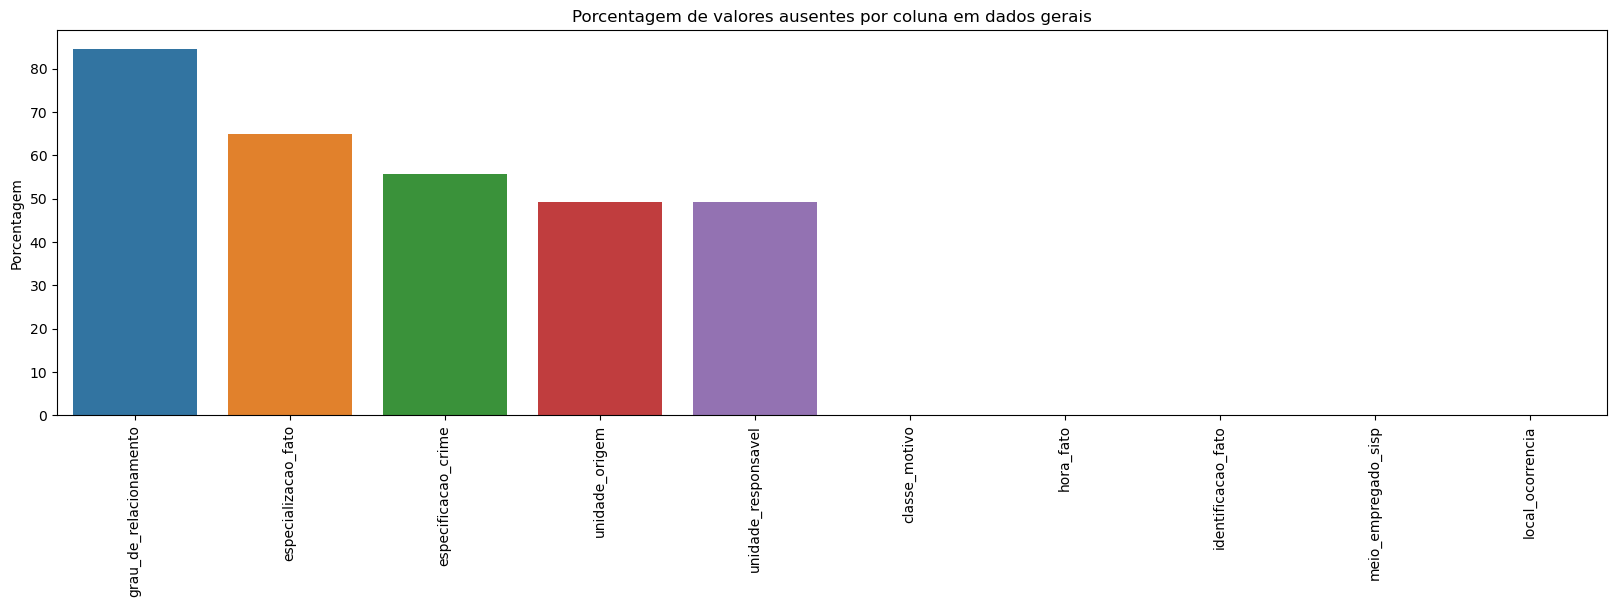

In [21]:
plt.figure(figsize=(20,5))
sns.barplot(x=missing.index, y=missing["Porcentagem"])
plt.xticks(rotation='vertical')
plt.title(f"Porcentagem de valores ausentes por coluna em dados gerais")
plt.show()

In [18]:
missing_by_column = infos_df.isnull().sum()
absol_miss = missing_by_column[missing_by_column > 0].sort_values(ascending=False)
perce_miss = absol_miss / infos_df.shape[0] * 100
dtype_miss = pd.Series({x: infos_df[x].dtype for x in absol_miss.index})

missing = pd.concat([dtype_miss, absol_miss, perce_miss], axis=1)
missing.columns = ["dtypes", "Absoluto", "Porcentagem"]
missing


,dtypes,Absoluto,Porcentagem
grau_de_relacionamento,object,202639,84.662918
aut_sit_emprego,object,175793,73.446613
aut_profissao,object,172044,71.880275
aut_grau_inst,object,171293,71.566506
aut_est_civil,object,171187,71.522219
aut_cor_pele,object,167396,69.938332
especializacao_fato,object,155228,64.854521
vit_situacao_emprego,object,152663,63.782860
especificacao_crime,object,133124,55.619433
unidade_responsavel,object,117952,49.280545


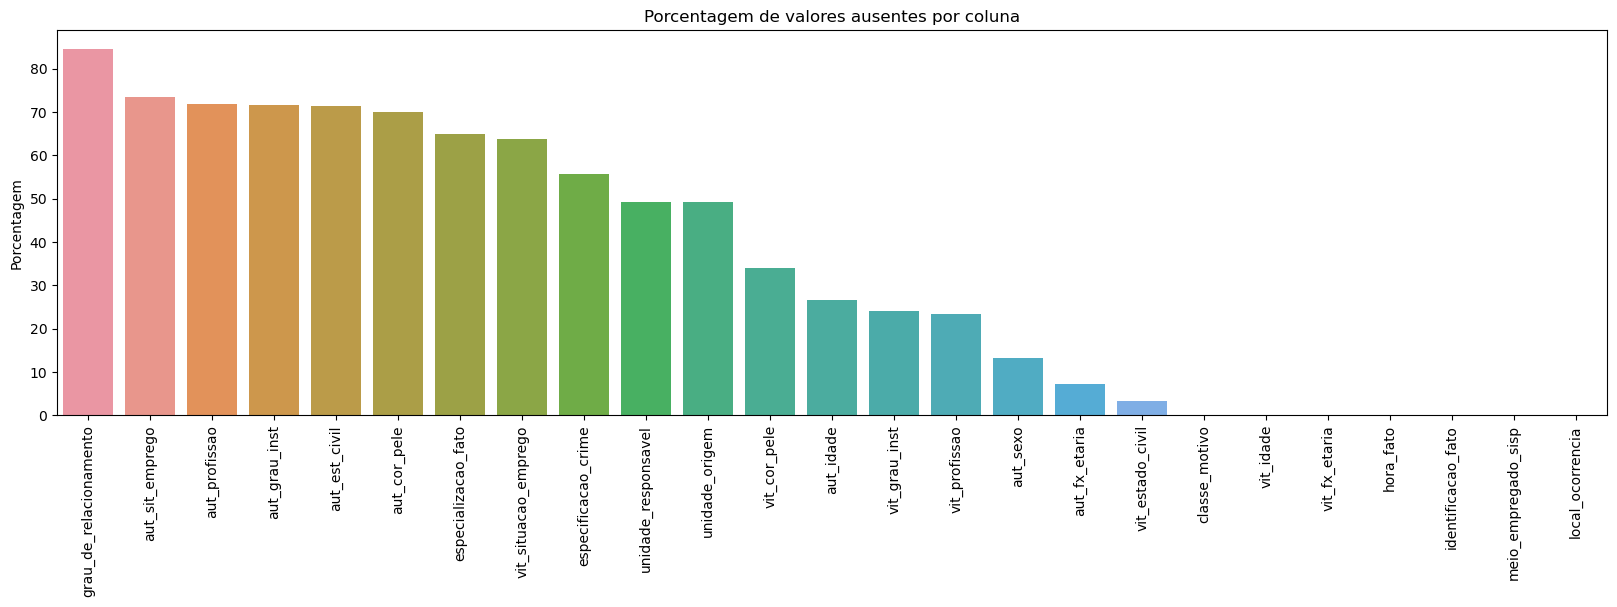

In [22]:
plt.figure(figsize=(20,5))
sns.barplot(x=missing.index, y=missing["Porcentagem"])
plt.xticks(rotation='vertical')
plt.title(f"Porcentagem de valores ausentes por coluna")
plt.show()